## Ideas for questions
Target variables positive and negative polarity

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', None)  

In [15]:
hr_data = pd.read_csv('data/HR_data.csv')
hr_data.head()

Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max   
0           0   78.663878         76.70   7.480043      67.25      92.48  \
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max   
0  23048.450       -1.091448    0.369955          -0.7300           0.9775  \
1  23959.920       -0.245338    0.338732          -0.3600           0.1900   
2  20324.605       -0.615922   -0.233047          -0.6300           0.3575   
3  24924.300       -0.866610   -0.046021          -0.4650           0.6500   
4  23052.100        0.200401   -0.560948          -0.3725           0.3375   

   HR_TD_Slope_mean  HR_TD_Slope  TEMP_TD_Mean  TEMP_TD_Median  TEMP_TD_std   
0          0.044590     0.046701     31.090000           31.11     0.163895  \
1         -0.028095    -0.024148     30.937293           30.93     0.083766   
2         -0.024202    -0.026008     30.735341           30.75     0.078038   
3          0.021375     0.021477     30.505025           30.29     0.366089   
4         -0.013555    -0.012871     30.332578           30.35     0.110119   

   TEMP_TD_Min  TEMP_TD_Max  TEMP_TD_AUC  TEMP_TD_Kurtosis  TEMP_TD_Skew   
0        30.59        31.31     36593.14          1.349570     -1.352915  \
1        30.81        31.17     38826.24          0.177872      0.898894   
2        30.59        30.89     31964.72         -0.956503     -0.143041   
3        30.11        31.15     36758.35         -1.513910      0.503921   
4        30.11        30.53     38795.38         -1.456255     -0.171929   

   TEMP_TD_Slope_min  TEMP_TD_Slope_max  TEMP_TD_Slope_mean  TEMP_TD_Slope   
0          -0.002286           0.000377           -0.000589      -0.000455  \
1          -0.001062           0.000714            0.000232       0.000241   
2          -0.000962           0.000777           -0.000085      -0.000155   
3          -0.000556           0.002963            0.000667       0.000704   
4          -0.000962           0.000192           -0.000314      -0.000300   

   EDA_TD_P_Mean  EDA_TD_P_Median  EDA_TD_P_std  EDA_TD_P_Min  EDA_TD_P_Max   
0       0.000172         0.000006      0.000927     -0.006185      0.007375  \
1       0.000489         0.000035      0.001138      0.000000      0.008462   
2       0.000155         0.000002      0.000444      0.000000      0.005550   
3       0.000673         0.000018      0.001829      0.000000      0.012784   
4       0.001164         0.000074      0.002936     -0.001992      0.022954   

   EDA_TD_P_AUC  EDA_TD_P_Kurtosis  EDA_TD_P_Skew  EDA_TD_P_Slope_min   
0      0.202712          28.467716       1.091696           -0.000200  \
1      0.614382          18.455509       3.948751           -0.000273   
2      0.161122          36.768442       5.151764           -0.000045   
3      0.811271          19.045235       4.165664           -0.000271   
4      1.484085          20.998111       4.209074           -0.000646   

   EDA_TD_P_Slope_max  EDA_TD_P_Slope_mean  EDA_TD_P_Slope  EDA_TD_T_Mean   
0            0.000198            -0.000004    4.360220e-06       0.181286  \
1            0.000451             0.000001   -2.617585e-06       0.169909   
2            0.000054            -0.000001   -1.084815e-06       0.166798   
3            0.000309             0.000002   -5.062888e-08       0.159292   
4            0.000639             0.000005    1.344367e-05       0.150387   

   EDA_TD_T_Median  EDA_TD_T_std  EDA_TD_T_Min  EDA_TD_T_Max  EDA_TD_T_AUC   
0         0.182695      0.003744      0.169440      0.186816    213.374114  \
1         0.169617      0.002976      0.164504      0.179273    213.235380   
2         0.166706      0.002266      0.162036      0.172624    1

In [16]:
# list hr_data columns and their data types
hr_data.dtypes

Unnamed: 0        int64
HR_TD_Mean      float64
HR_TD_Median    float64
HR_TD_std       float64
HR_TD_Min       float64
                 ...   
nervous         float64
attentive       float64
afraid          float64
active          float64
determined      float64
Length: 68, dtype: object

In [17]:
# List non numeric columns
hr_data.select_dtypes(include=['object']).columns
# Example data for each column
for column in hr_data.select_dtypes(include=['object']).columns:
    print(f"{column} : {hr_data[column].iloc[0]}")

Round : round_3
Phase : phase3
Cohort : D1_4


In [18]:
# I want to make two new columns (positive_polarity and negative_polarity) out of the folllowing columns
# upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined

# Print `Frustrated` column unique values
print(hr_data['Frustrated'].unique())

# Scale Frustrated from 0 to 5 and round it
hr_data['Frustrated'] = hr_data['Frustrated'].apply(lambda x: round(x))

# upset,hostile,ashamed,nervous,afraid, alert, Frustrated = negative_polarity
# inspired,attentive,active,determined = positive_polarity
hr_data['positive_polarity'] = hr_data[['inspired','attentive','active','determined']].sum(axis=1)
hr_data['negative_polarity'] = hr_data[['upset','hostile','ashamed','nervous','afraid','alert', 'Frustrated']].sum(axis=1)

# Delete the old columns
hr_data.drop(columns=['upset','hostile','ashamed','nervous','afraid','alert','inspired','attentive','active','determined', 'Frustrated'], inplace=True)

# Also I want a column that says if the person has overall positive or negative polarity
hr_data['overall_polarity'] = 'positive'
hr_data.loc[hr_data['negative_polarity'] > hr_data['positive_polarity'], 'overall_polarity'] = 'negative'

# Remove the positive and negative polarity columns
hr_data.drop(columns=['positive_polarity','negative_polarity'], inplace=True)

[2. 3. 0. 1. 7. 4. 5. 6. 8.]


In [19]:
# Print unique values of Cohort
hr_data['Cohort'].unique()

# I want to have for example Cohort to be instead 4 columns with 1 or 0, same with Round and Phase
hr_data = pd.get_dummies(hr_data, columns=['Cohort'])
hr_data = pd.get_dummies(hr_data, columns=['Round'])
hr_data = pd.get_dummies(hr_data, columns=['Phase'])

In [20]:
print(hr_data.isnull().sum().sort_values(ascending=False))
# Is there a record row with multiple missing values in the data (>2)? --> One record only
# hr_data[hr_data.isnull().sum(axis=1) > 2].head()
# # remove Unamed column
# hr_data.drop('Unnamed: 0', axis=1, inplace=True)
print(f"Columns # (before removing NaN columns): {hr_data.shape[1]}")
# hr_data.dropna(inplace=True)
# print(f"Records (after drop)#: {hr_data.shape[0]}")
# Remove the columsn that have missing values
hr_data.dropna(axis=1, inplace=True)
print(f"Columns # (after removing NaN columns): {hr_data.shape[1]}")

EDA_TD_P_ReT         1
EDA_TD_P_RT          1
EDA_TD_P_Slope       0
EDA_TD_T_Mean        0
EDA_TD_T_Median      0
                    ..
EDA_TD_P_Min         0
EDA_TD_P_Max         0
EDA_TD_P_AUC         0
EDA_TD_P_Kurtosis    0
Phase_phase3         0
Length: 68, dtype: int64
Columns # (before removing NaN columns): 68
Columns # (after removing NaN columns): 66


In [27]:
# list hr_data columns and their data types
# show full columns
hr_data.info(verbose=True)
hr_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           312 non-null    int64  
 1   HR_TD_Mean           312 non-null    float64
 2   HR_TD_Median         312 non-null    float64
 3   HR_TD_std            312 non-null    float64
 4   HR_TD_Min            312 non-null    float64
 5   HR_TD_Max            312 non-null    float64
 6   HR_TD_AUC            312 non-null    float64
 7   HR_TD_Kurtosis       312 non-null    float64
 8   HR_TD_Skew           312 non-null    float64
 9   HR_TD_Slope_min      312 non-null    float64
 10  HR_TD_Slope_max      312 non-null    float64
 11  HR_TD_Slope_mean     312 non-null    float64
 12  HR_TD_Slope          312 non-null    float64
 13  TEMP_TD_Mean         312 non-null    float64
 14  TEMP_TD_Median       312 non-null    float64
 15  TEMP_TD_std          312 non-null    flo

Unnamed: 0         int64
HR_TD_Mean       float64
HR_TD_Median     float64
HR_TD_std        float64
HR_TD_Min        float64
                  ...   
Round_round_3       bool
Round_round_4       bool
Phase_phase1        bool
Phase_phase2        bool
Phase_phase3        bool
Length: 66, dtype: object

In [21]:
# # Remove outliers with z-score
# from scipy import stats


# print(f"Records (before dropping outliers)#: {hr_data.shape[0]}")
# z = np.abs(stats.zscore(hr_data.select_dtypes(include=['float64'])))
# threshold = 3
# hr_data = hr_data[(z < threshold).all(axis=1)]
# print(f"Records (after dropping outliers)#: {hr_data.shape[0]}")

In [28]:
# Remove outliers (other method)
# Outliers
 
means = hr_data.mean()
stds = hr_data.std()
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds

print(f"Records (before dropping outliers)#: {hr_data.shape[0]}")


# Select only float columns

float_columns = hr_data.select_dtypes(include=['float64']).columns
for column in float_columns:
    hr_data = hr_data[(hr_data[column] >= lower_bounds[column]) & (hr_data[column] <= upper_bounds[column])]

# Show how many outliers were removed
print(f"Records (after dropping outliers)#: {hr_data.shape[0]}")

TypeError: Could not convert ['negativenegativepositivepositivenegativepositivenegativepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivenegativenegativenegativenegativenegativenegativepositivenegativenegativenegativenegativepositivenegativenegativenegativenegativenegativenegativepositivenegativenegativenegativenegativenegativenegativepositivenegativepositivenegativepositivenegativepositivepositivepositivenegativenegativepositivenegativepositivenegativenegativepositivenegativenegativepositivepositivepositivepositivenegativenegativenegativenegativenegativenegativepositivepositivepositivenegativenegativepositivenegativenegativepositivenegativepositivenegativepositivepositivenegativenegativenegativenegativepositivenegativenegativepositivenegativenegativenegativepositivenegativepositivepositivenegativepositivenegativenegativepositivepositivepositivepositivepositivenegativepositivenegativenegativepositivenegativepositivenegativenegativenegativenegativenegativenegativenegativenegativepositivepositivenegativenegativepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivenegativepositivepositivenegativenegativepositivenegativenegativenegativenegativenegativenegativepositivenegativenegativenegativepositivenegativenegativepositivenegativenegativepositivenegativenegativepositivenegativenegativenegativenegativepositivepositivenegativepositivenegativepositivenegativenegativepositivepositivepositivenegativenegativepositivenegativenegativepositivepositivenegativenegativenegativenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativenegativenegativenegativenegativenegativenegativepositivenegativenegativepositivenegativenegativenegativepositivenegativepositivepositivenegativenegativepositivepositivepositivepositive'] to numeric

In [ ]:
# I want the overall_polarity column to be my target column so I want to keep it out of the PCA analysis
target = hr_data['overall_polarity']
hr_data.drop(columns=['overall_polarity'], inplace=True)

<Axes: >

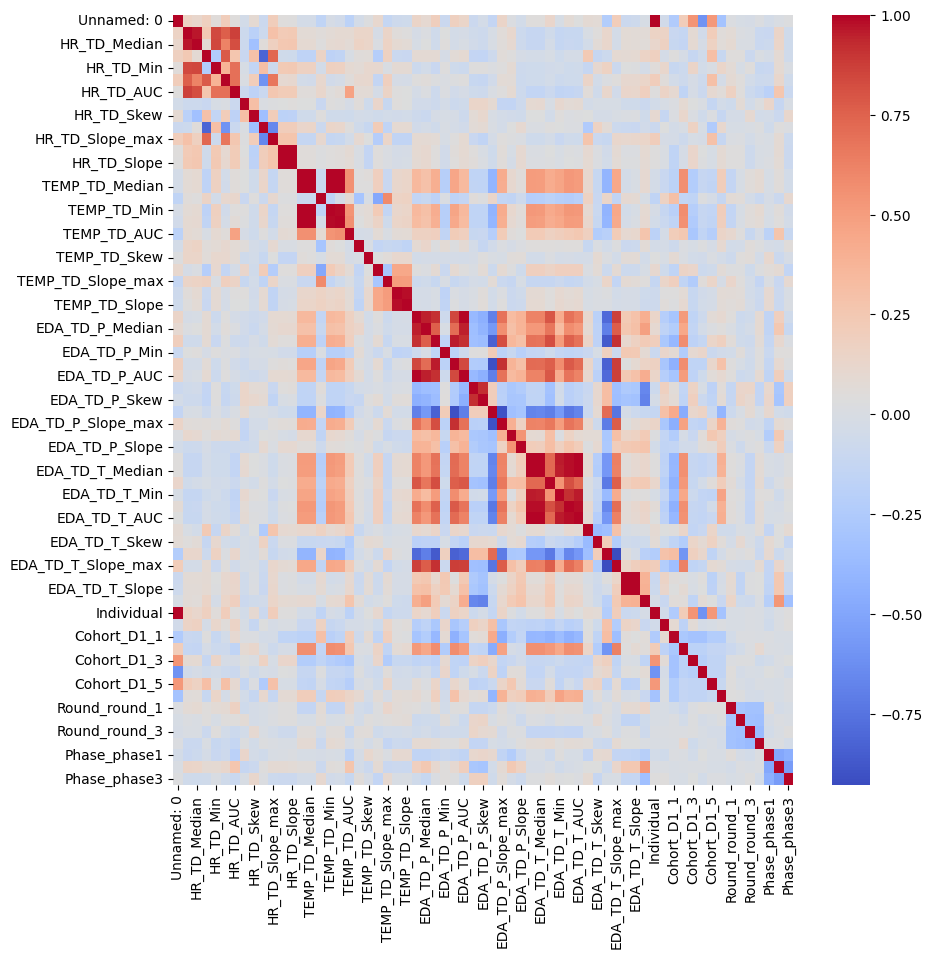

In [ ]:
# Correlation of the features
correlation = hr_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cmap='coolwarm')

In [ ]:
# I want to remove the columns that have correlation > 0.9
# and keep only one of them
# columns = np.full((correlation.shape[0],), True, dtype=bool)
# for i in range(correlation.shape[0]):
#     for j in range(i+1, correlation.shape[0]):
#         if correlation.iloc[i, j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False

# selected_columns = hr_data.columns[columns]
# hr_data = hr_data[selected_columns]
# print(f"Columns # (after removing high correlation columns): {hr_data.shape[1]}")

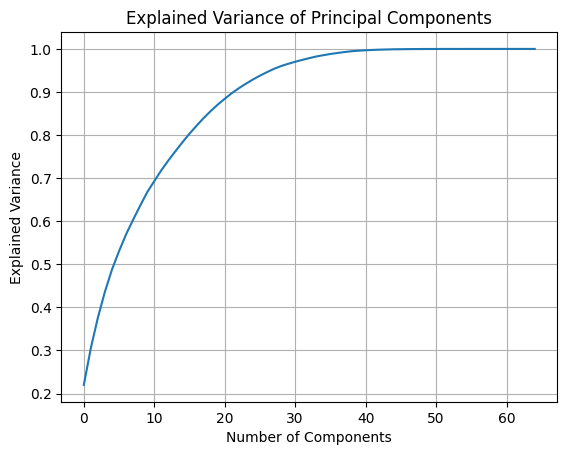

Number of components for 80% explained variance: 18


In [ ]:
# I want to perform PCA analysis on the data for unsupervised learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
hr_data_scaled = scaler.fit_transform(hr_data)

# PCA
# How to chose the number of components?
# Plot the explained variance for different number of components
pca = PCA()
pca.fit(hr_data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Principal Components')
plt.grid()
plt.show()
# Also show at which point the explained variance is at least 85%
N = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.85)
print(f"Number of components for 85% explained variance: {N}")


In [ ]:
# Perform PCA with N components
pca = PCA(n_components=N)
pca.fit(hr_data_scaled)
hr_data_pca = pca.transform(hr_data_scaled)

# Create a DataFrame with the PCA components
hr_data_pca = pd.DataFrame(hr_data_pca, columns=[f"PC{i}" for i in range(N)])
hr_data_pca.head()

PC0       PC1       PC2       PC3       PC4       PC5       PC6   
0 -3.764371  1.463451 -1.740899  1.195590  0.400253  0.498744  5.263276  \
1 -3.801667 -0.873673  0.286654  1.995604 -0.743014  1.114569 -0.044653   
2 -4.566694 -1.706821 -0.832021  0.412706 -0.654067  1.944381  1.550056   
3 -4.406949  0.796498  1.535723  1.126822  2.706660  4.974337 -2.492369   
4 -4.102317 -0.817423 -1.223813  1.850677 -1.763733  0.971967  1.717098   

        PC7       PC8       PC9      PC10      PC11      PC12      PC13   
0 -1.456615 -2.076467  1.345089 -2.313977 -0.735589  0.312275  1.013215  \
1 -0.845835  1.042643  0.191524 -1.589184  1.280067 -1.684703  0.205469   
2 -0.939646  0.470919  0.147548 -3.108082  0.868905 -0.645068  0.034249   
3 -1.519941 -2.341696  0.956009 -1.651153  1.106070 -1.432483 -2.016538   
4 -0.753253 -0.642041 -0.304042  0.683836  1.194584 -1.691837 -1.022991   

       PC14      PC15      PC16      PC17  
0  1.419141 -0.880810  0.413376  2.094398  
1  0.522303  0.614405 -0.128051  1.407691  
2 -0.544121  1.729555 -1.520384  1.445994  
3  0.269893 -1.879462 -0.966716  0.498824  
4 -1.158040 -0.504872 -1.962383  0.385010

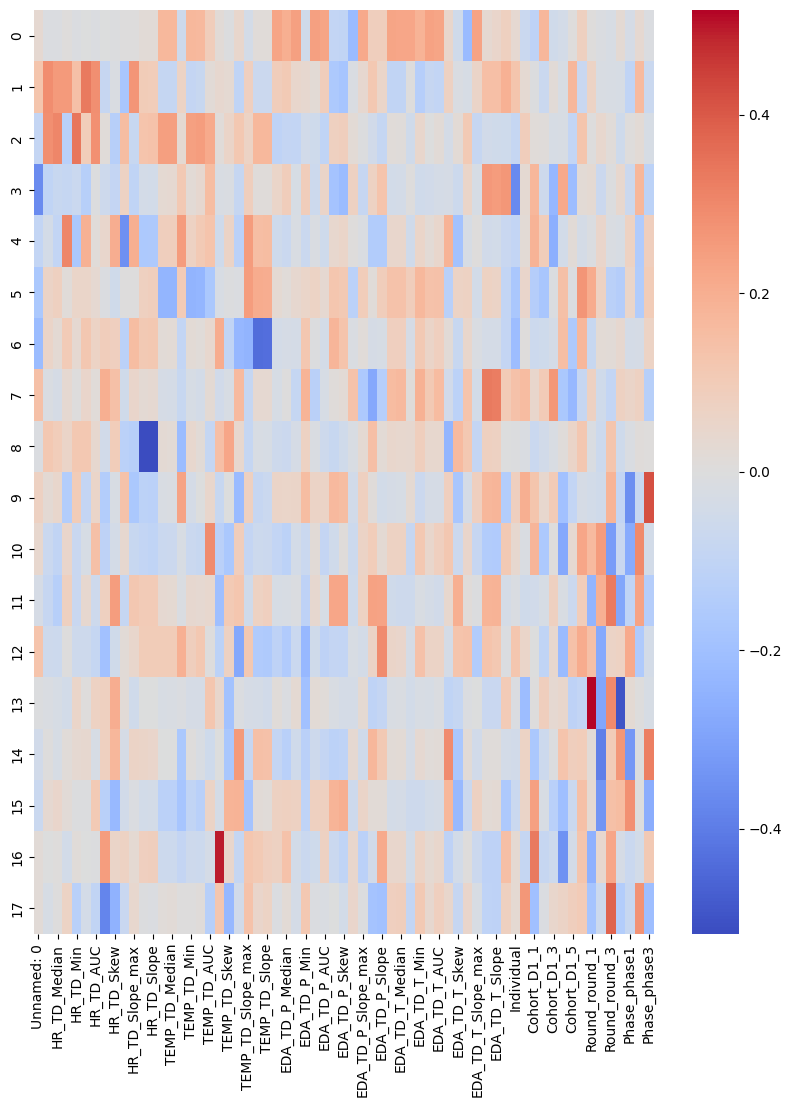

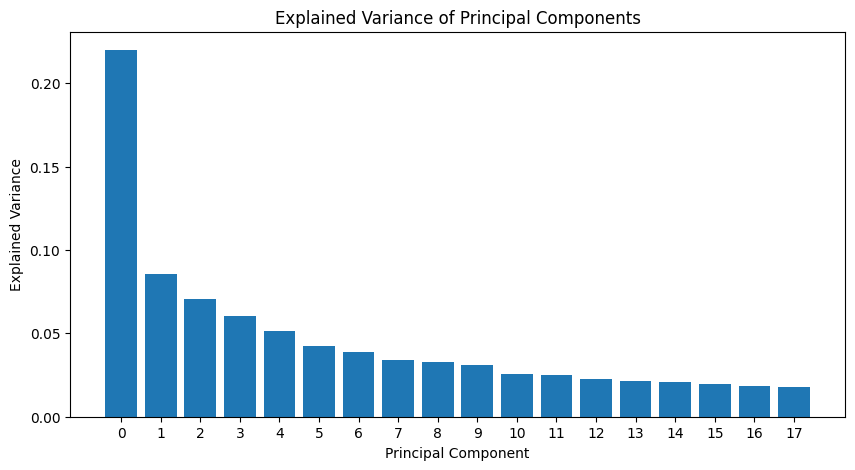

In [ ]:
# Show how each component is contributing to the original features
components = pd.DataFrame(pca.components_, columns=hr_data.columns)
plt.figure(figsize=(10, 12))
sns.heatmap(components, cmap='coolwarm', annot=False)

# How much variance does each component explain?
plt.figure(figsize=(10, 5))
plt.bar(range(N), pca.explained_variance_ratio_)
plt.xticks(range(N))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Principal Components')
plt.show()


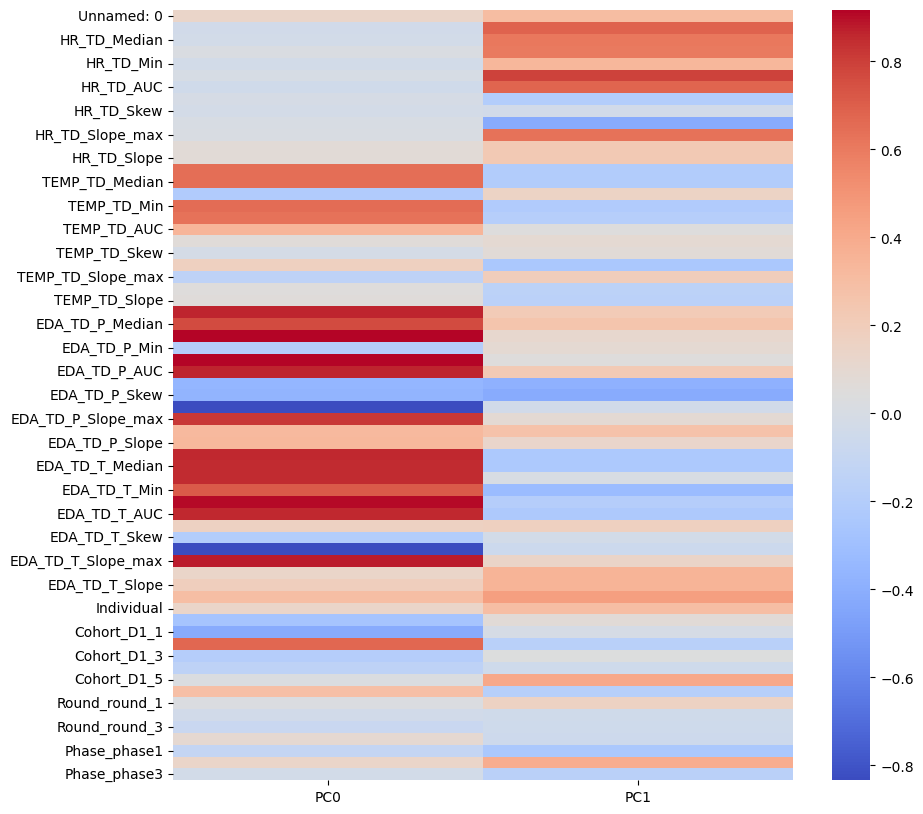

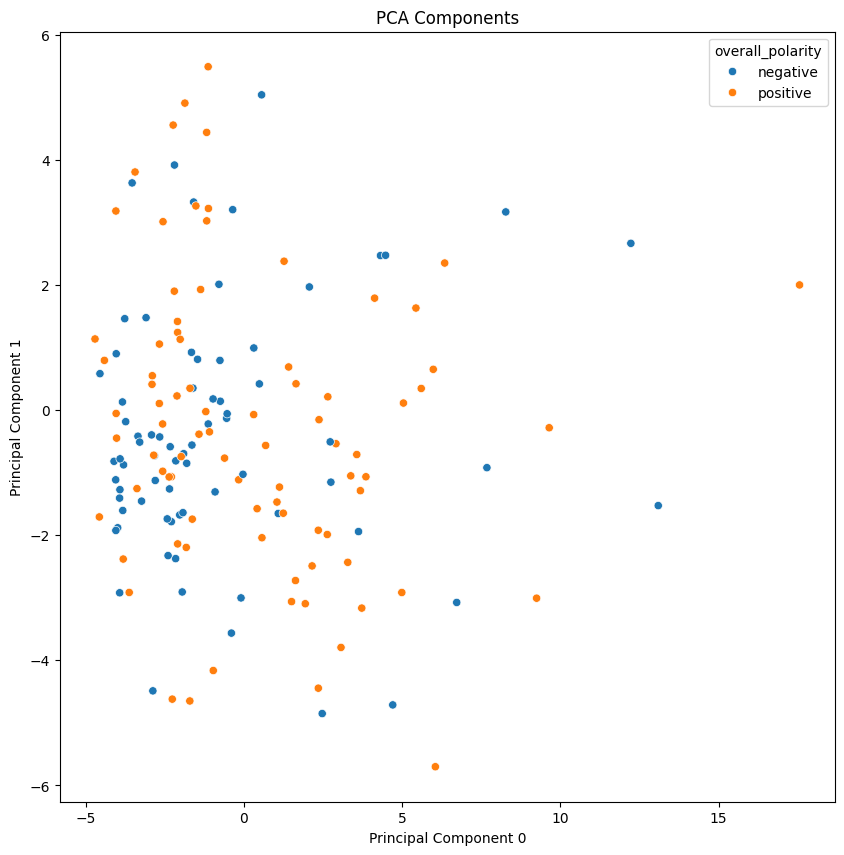

In [ ]:
# Now I want to further analyze the components and how the features contribute to the components

# Get the loadings of the PCA components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(N)], index=hr_data.columns)
loadings_df.head()

# Plot the loadings of the first two components and how much each feature contributes to them
plt.figure(figsize=(10, 10))
sns.heatmap(loadings_df[['PC0', 'PC1']], cmap='coolwarm', annot=False)

# I want to see how the components are distributed
# Plot the first two components (PC0 and PC1) and color them based on the target column
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC0', y='PC1', data=hr_data_pca, hue=target)
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.title('PCA Components')
plt.show()


<Figure size 1000x1000 with 0 Axes>

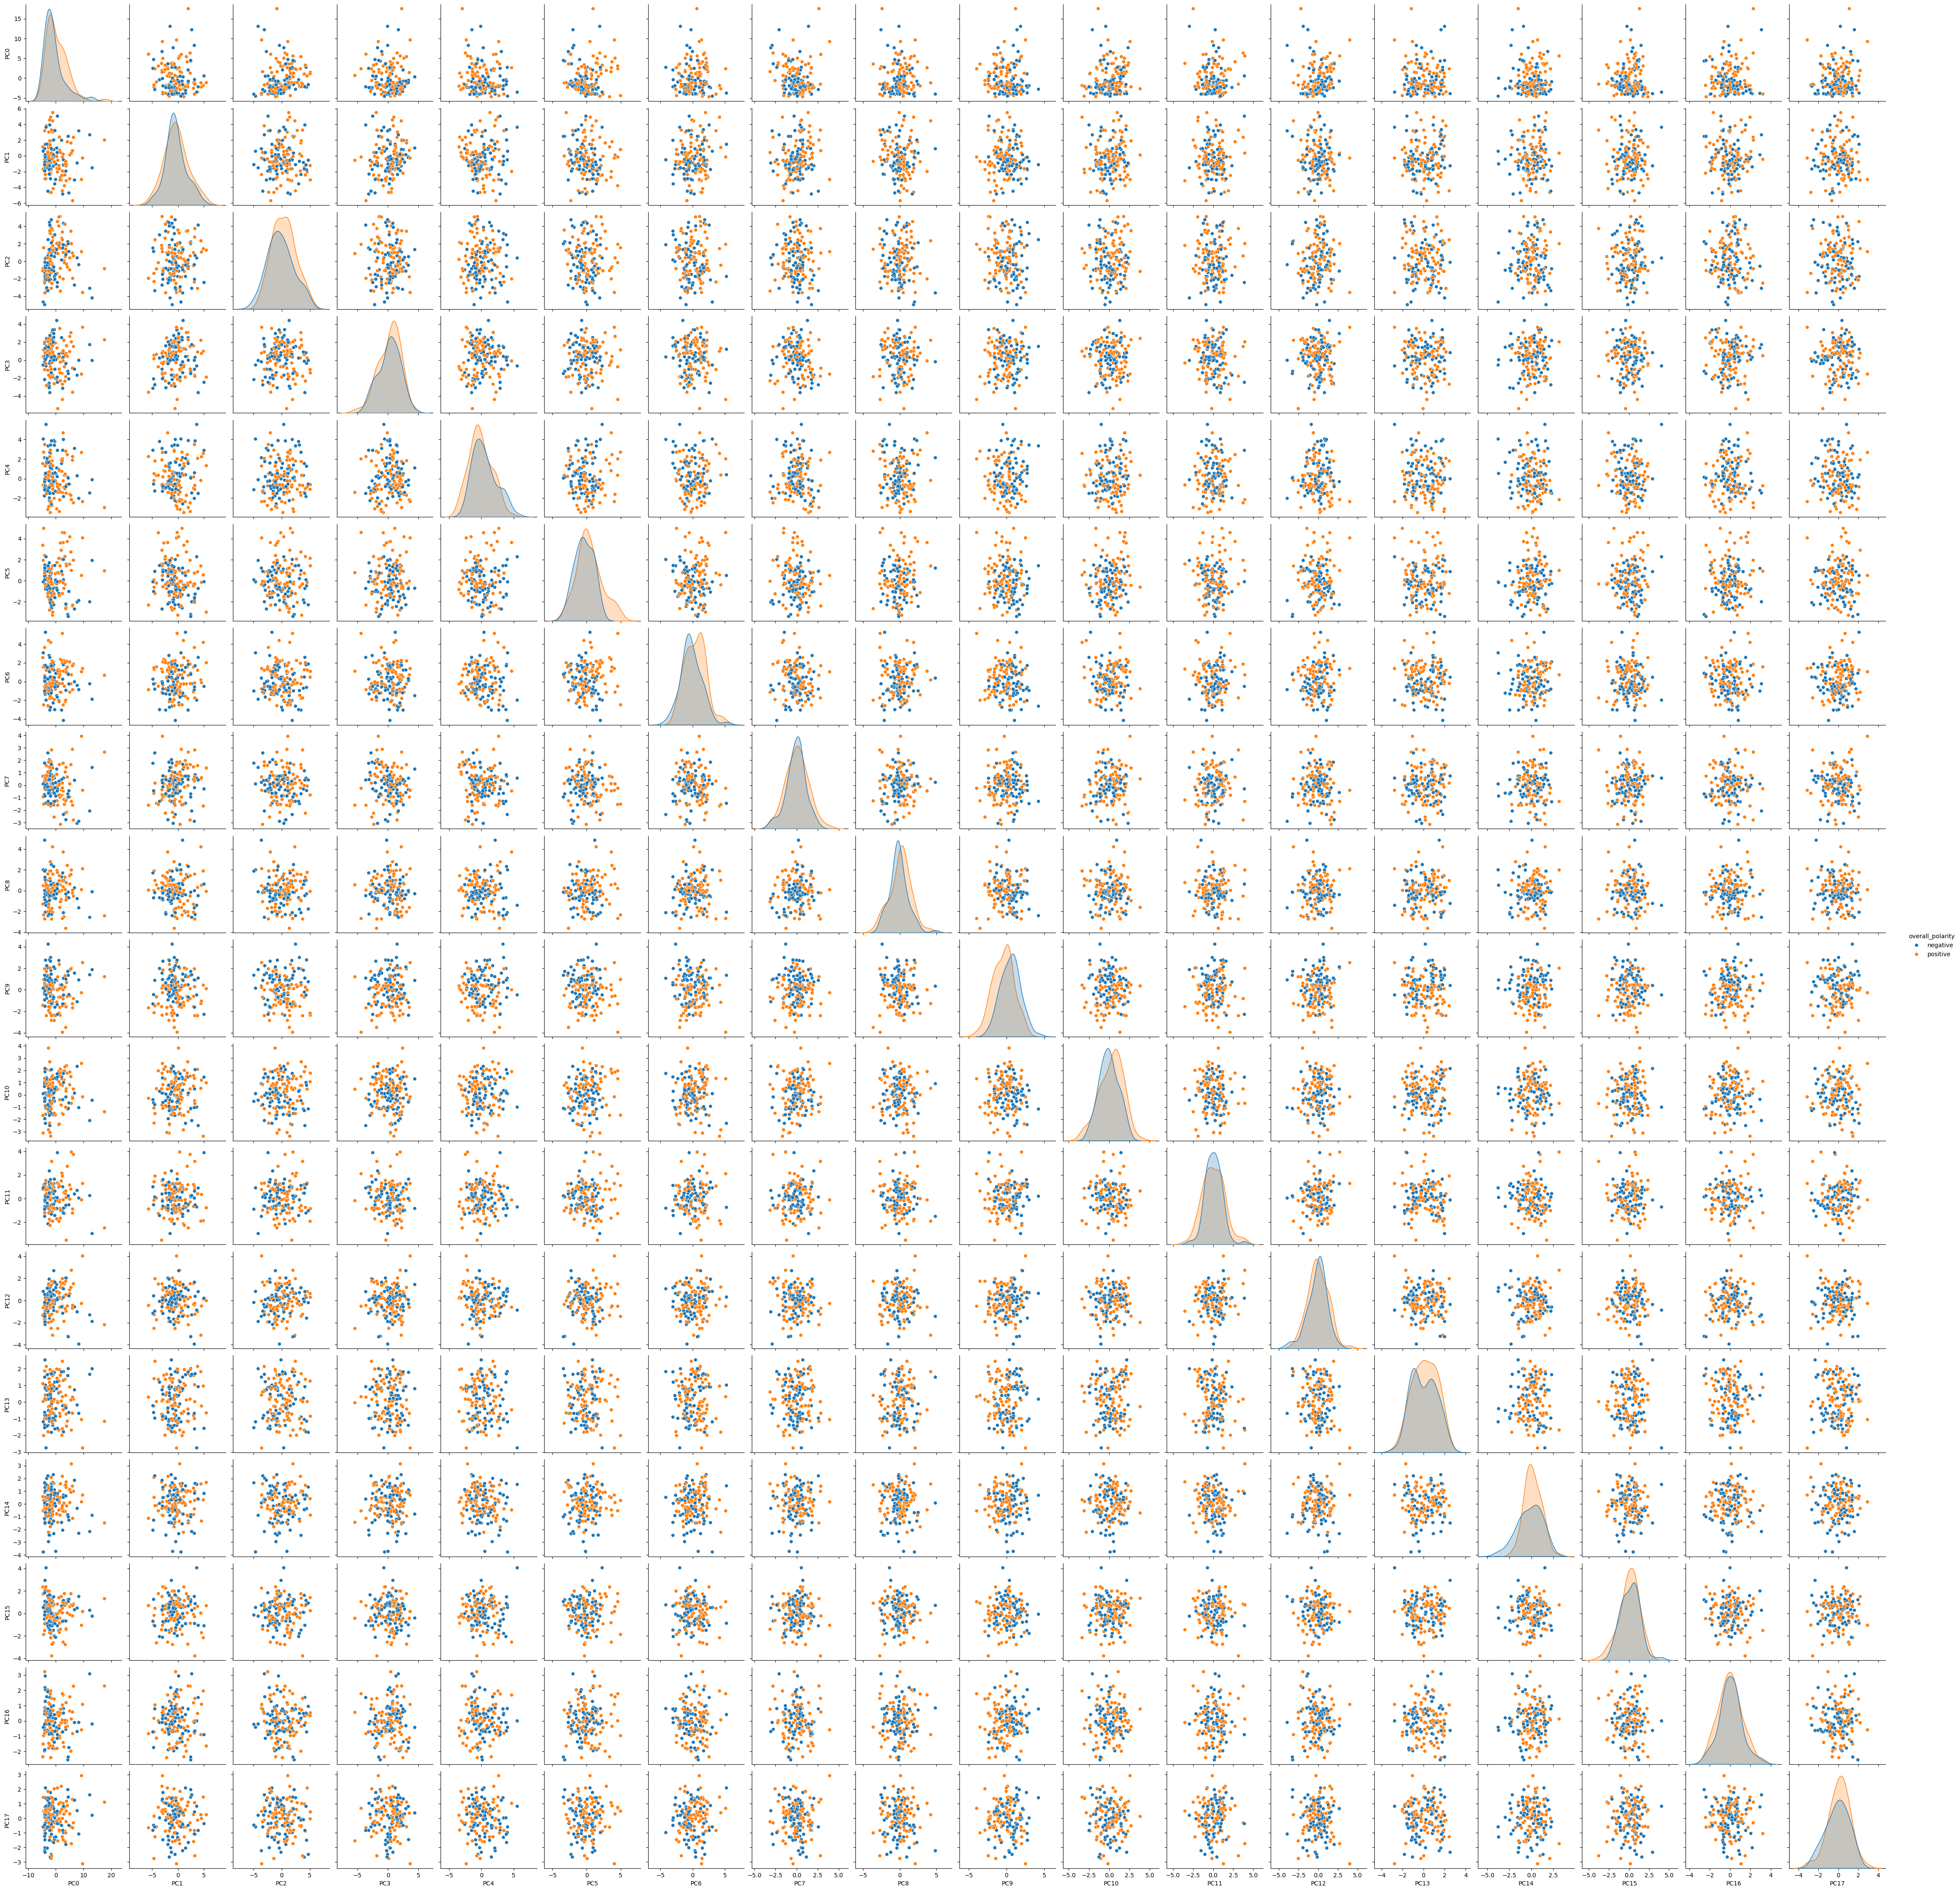

In [ ]:
# I want to visualize the PCA components so I can see If I can find any visual teamings with respect to my target variable (overall_polarity)

# I want to see how the components are distributed
# Pairplot all the components
hr_data_pca['overall_polarity'] = target
plt.figure(figsize=(10, 10))
sns.pairplot(hr_data_pca, hue='overall_polarity')
plt.show()

# drop the target column
hr_data_pca.drop(columns=['overall_polarity'], inplace=True)
